<a href="https://colab.research.google.com/github/ananyabadkar/movie-ratings-Spark-practice-notebooks-/blob/main/notebooks/%20ApacheSpark_by_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install pyspark
!pip install pyspark -q


In [2]:
from pyspark.sql import SparkSession
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data = [("alice", 34 , "engineer"),
("bob", 45 , "manager"),
("charlie", 25 , "data analyst"),
("david", 37 , "researcher")]
columns= ["name","age", "occupation"]
spark = SparkSession.builder.appName("pyspark apllication with python libraries").getOrCreate()
df = spark.createDataFrame(data, columns)

In [7]:
#convert df to pandas
pandas_df=df.toPandas()

In [14]:
#use pandas to filter data
filtered_df = pandas_df[pandas_df["age"] > 30]

In [20]:
#group by occupation and calculate average age
avg_age_by_occupation = filtered_df.groupby('occupation')['age'].mean()

In [21]:
print("\n avg_age_by_occupation")
print(avg_age_by_occupation)


 avg_age_by_occupation
occupation
engineer      34.0
manager       45.0
researcher    37.0
Name: age, dtype: float64


In [22]:
mean_age = np.mean(filtered_df["age"])


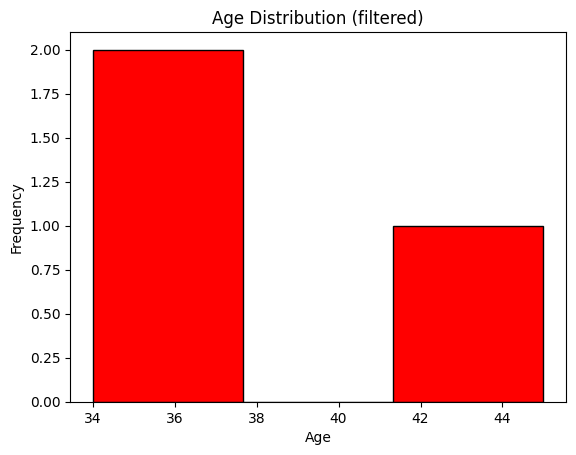

In [24]:
plt.hist(filtered_df["age"], bins=3, color="red", edgecolor='black')
plt.title("Age Distribution (filtered)")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [25]:
spark.stop()